In [ ]:
import numpy as np
import math
from scipy.stats import norm
import time
import pandas as pd
import statsmodels.api as sm
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.models import Sequential
from matplotlib import pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Transmited label data file
from google.colab import files
import io
#number of receiverd particle
uploadedy = files.upload()
#data label
uploadedx = files.upload()
#number of receiverd particle
uploadedy1 = files.upload()
#data label
uploadedx1 = files.upload()

Saving ri.csv to ri (1).csv


Saving tx.csv to tx (1).csv


Saving riw.csv to riw.csv


Saving riw.csv to riw (1).csv


In [ ]:
uploadedx1 = files.upload()

Saving txw.csv to txw.csv


In [ ]:
#for the training
datasetx = pd.read_csv(io.BytesIO(uploadedx['tx.csv']), delimiter=',')
datasety = pd.read_csv(io.BytesIO(uploadedy['ri.csv']), delimiter=',')

#for the testing
datasetx1 = pd.read_csv(io.BytesIO(uploadedx1['txw.csv']), delimiter=',')
datasety1 = pd.read_csv(io.BytesIO(uploadedy1['riw.csv']), delimiter=',')

ri = datasety.iloc[:, 0:1].values
tx = datasetx.iloc[:, 0:1].values

ri1 = datasety1.iloc[:, 0:1].values
tx1 = datasetx1.iloc[:, 0:1].values


In [ ]:
ri=np.array(ri)
ri = np.reshape(ri, (ri.shape[0], 1))

# Shape of FM signal vector
print("Size of data: " + str(ri.shape))

Size of data: (3000, 1)


In [ ]:
tx=np.array(tx)
tx = np.reshape(tx, (tx.shape[0], 1))

In [ ]:
seed = 900
np.random.seed(seed)
#Loading the data, here It's a feature data, which contains 4 features as mentioned in papers 

#ANN Model 
# create model
model1 = Sequential() # This means it's sequential model, which is from one direction to another in sequence 
model1.add(Dense(7, input_dim=1, kernel_initializer='uniform', activation='sigmoid'))#First layer with 20 nodes and as we have 4 features so input_dim would be 4, relu suits well for binary classification so I have used it  #You can add as many hidden layer you want, but with time complexity 

model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #Output layer
# Compile model1
#This function you have to explore in case you want to do the mathematic analysis
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#for the snr V/S epoch graph we are saving the model into the histroy varible...
history1=model1.fit(ri, tx, validation_split=0.33,epochs=50, batch_size=100,  verbose=1)

#Evaluate the model
scores = model1.evaluate(ri, tx)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))



Epoch 1/50
21/21 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.6177 - val_loss: 0.9457 - val_accuracy: 0.4914
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6137 - val_loss: 0.9282 - val_accuracy: 0.4914
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6177 - val_loss: 0.9296 - val_accuracy: 0.4914
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6068 - val_loss: 0.9231 - val_accuracy: 0.4914
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6167 - val_loss: 0.9373 - val_accuracy: 0.4914
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6137 - val_loss: 0.9338 - val_accuracy: 0.4914
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.6142 - val_loss: 0.9391 - val_accuracy: 0.4914
Epoch 8/50
21/21 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


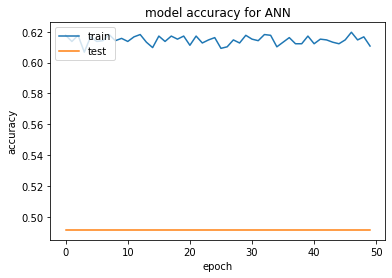

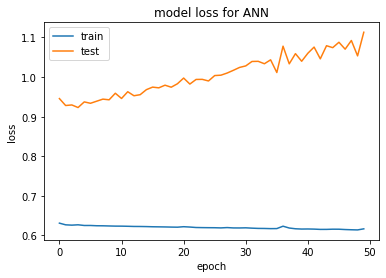

In [ ]:

print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy for ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('ann_accu')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss for ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('ann_loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

4/4 [==============================] - 0s 3ms/step - loss: 1.4018 - accuracy: 0.0000e+00
At SNR = -5
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.4021 - accuracy: 0.0000e+00
At SNR = -4
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.4018 - accuracy: 0.0000e+00
At SNR = -3
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.3997 - accuracy: 0.0000e+00
At SNR = -2
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.4001 - accuracy: 0.0000e+00
At SNR = -1
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.4018 - accuracy: 0.0000e+00
At SNR = 0
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.3996 - accuracy: 0.0000e+00
At SNR = 1
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.3974 - accuracy: 0.0000e+00
At SNR = 2
accuracy: 0.00%
4/4 [==============================] - 0s 2ms/step - loss: 1.3980 -

No handles with labels found to put in legend.


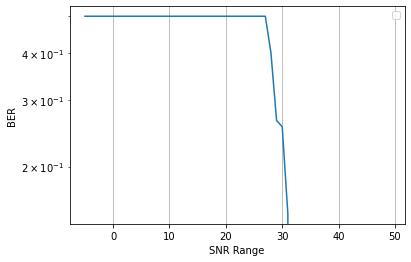

In [ ]:
pd_FM = {}
idx=0
X_FM_lb=[]
for snr in range(-5, 50, 1):
  X_FM_lb.append(ri1[idx:idx+100])
  idx=idx+100

#print(X_FM_lb)


for snr in range(-5, 50, 1):
  y_snr = np.ones((X_FM_lb[snr+5].shape[0], 1))
  scores = model1.evaluate(X_FM_lb[snr+5], y_snr)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
  pd_FM[snr] =(1- scores[1])/2
  
plt.plot(range(-5, 50, 1), list(pd_FM.values()))

# printing the graph
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('BER')
plt.grid()
plt.savefig('ann_orig')
plt.legend(loc='upper right',ncol = 1)
plt.savefig('snip')
plt.show()